In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
print(f"Train dataframe has shape: {train_df.shape}")
print(f"Test dataframe has shape: {test_df.shape}")
display(train_df.head())
display(test_df.head())

Train dataframe has shape: (31390, 5)
Test dataframe has shape: (2413, 4)


,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [3]:
train_df.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [4]:
#check Nan values
train_df.isnull().sum()/train_df.shape[0]*100

seq_id               0.000000
protein_sequence     0.000000
pH                   0.911118
data_source         10.662631
tm                   0.000000
dtype: float64

less than 1% of Nan values in pH feature, I will drop this Nan value from our data for the sake of predictions

### Analyzing the protein sequence length

In [5]:
#create column protein_seq_length for train and test df
train_df["protein_seq_length"] = train_df["protein_sequence"].apply(lambda x: len(x))
test_df["protein_seq_length"] = test_df["protein_sequence"].apply(lambda x: len(x))

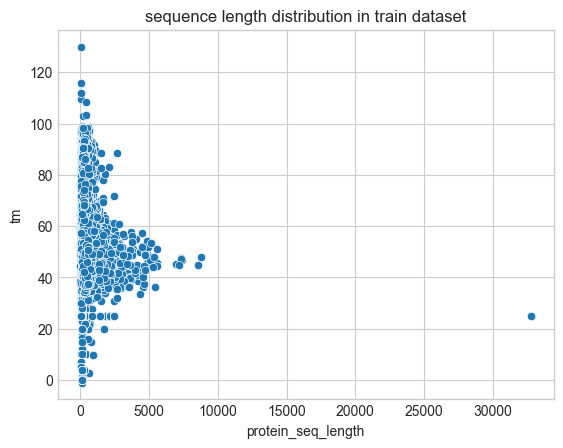

In [6]:
#ploting protein seq length in train dataset
sns.scatterplot(data=train_df,
                x="protein_seq_length",
                y='tm')
plt.title("sequence length distribution in train dataset")
plt.show()

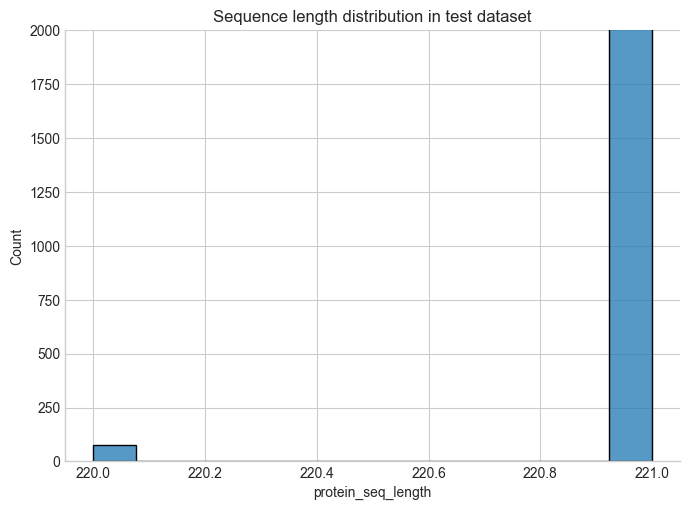

In [7]:
#plotting protein sequence length in test data
sns.displot(data=test_df,
           x='protein_seq_length',
           kind='hist',
           aspect=1.4)
plt.title("Sequence length distribution in test dataset")
plt.ylim(0, 2000)
plt.show()

In [8]:
print("------ TRAIN SET--------")
display(train_df["protein_seq_length"].describe())
print("------- TEST SET--------")
display(test_df["protein_seq_length"].describe())

------ TRAIN SET--------


count    31390.000000
mean       447.669513
std        640.728935
min          5.000000
25%        197.000000
50%        336.000000
75%        523.000000
max      32767.000000
Name: protein_seq_length, dtype: float64

------- TEST SET--------


count    2413.000000
mean      220.968090
std         0.175798
min       220.000000
25%       221.000000
50%       221.000000
75%       221.000000
max       221.000000
Name: protein_seq_length, dtype: float64

* The protein sequence length in our train dataset vary from 5 to 32,767 letter while the test dataset is constant having either 220 or 221. Let's keep discovering other problems in our dataset if it exists.

### Analyzing the pH

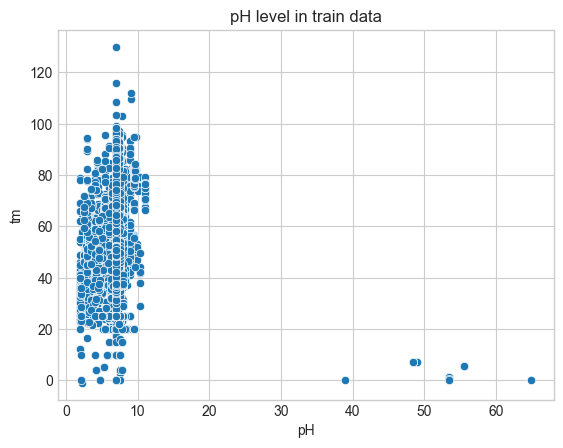

In [9]:
#plotting pH level in train data
sns.scatterplot(data=train_df, x='pH', y='tm')
plt.title("pH level in train data")
plt.show();

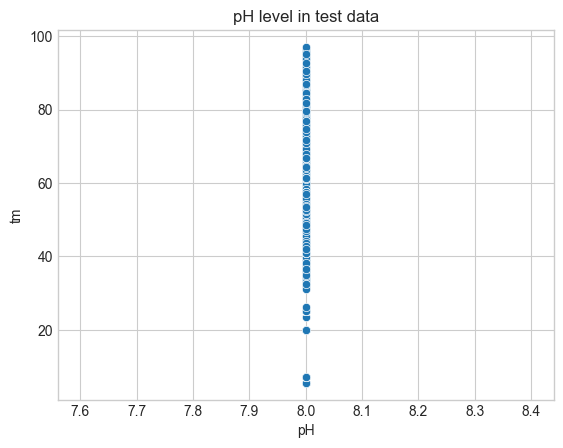

In [10]:
#plotting pH level in test data
sns.scatterplot(data=test_df,
                x='pH',
                y=train_df.tm)
plt.title("pH level in test data")
plt.show();

* pH is a measure of how acidic/basic water is. The range goes from 0 - 14, with 7 being neutral as we can see in our test data. However, in our train data there are some data points with pH level over 14. This is probably an issue with our train data. Let see train data pH values

In [11]:
#filter pH values greater than 14
ph_gt_14 = train_df[train_df['pH'] > 14]
ph_gt_14.head(5)

,seq_id,protein_sequence,pH,data_source,tm,protein_seq_length
973,973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,48.4,NaN,7.0,96
986,986,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...,48.4,NaN,7.0,96
988,988,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,49.0,NaN,7.0,96
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,NaN,5.5,96
1003,1003,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...,48.4,NaN,7.0,96


* There are some data points which have pH col had been swapped with tm col. Luckily, there update data csv file had released by host, which we need to use them and fix our these data quality issues.

### Analyzing target col tm

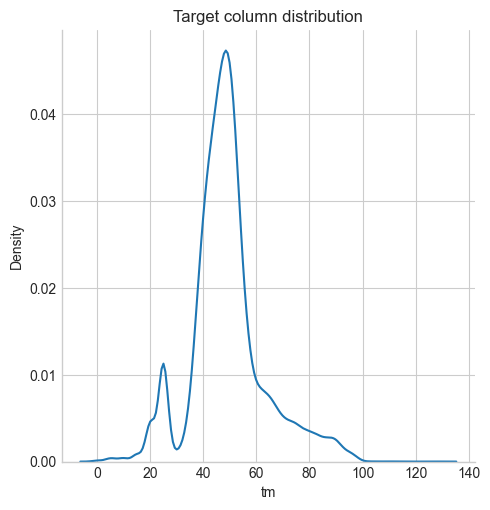

In [12]:
#plotting pH level in test data
sns.displot(data=train_df,
                x='tm',
           kind='kde')#['hist', 'kde', 'ecdf']
plt.title("Target column distribution")
plt.show();

* The target 'tm' column is kind of normal distribution with mean at around 50

In [13]:
#loading train_update data to fix train data
train_updates_df = pd.read_csv('data/train_updates_20220929.csv')

#sequence ids will be used to swap mapping tm and pH
Nan_filter = pd.isna(train_updates_df['pH'])
ids_pHtm_mapping = train_updates_df[~Nan_filter].groupby('seq_id')[['pH','tm']].first().to_dict('index')

#sequence ids that will be drop due to data quality issues
quality_filter = pd.isna(train_updates_df['pH'])
bad_seq_ids = train_updates_df[quality_filter]['seq_id'].to_list()

#### Example of data quality issue

In [14]:
#quality issue rows display base on train updates csv file provided
print('\n...Examples of rows with quality issue...')
print('\n...rows duplicated with suspious values in tm and pH...\n')
display(train_df[train_df['seq_id'].isin(bad_seq_ids)].head(5))

print('\n...Examples of rows where pH and tm have been swapped..\n')
display(train_df[train_df['pH']>14.0].head(5))


...Examples of rows with quality issue...

...rows duplicated with suspious values in tm and pH...



,seq_id,protein_sequence,pH,data_source,tm,protein_seq_length
69,69,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKARAAALDAQKATPP...,5.0,NaN,25.0,106
70,70,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0,106
71,71,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0,106
72,72,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0,106
73,73,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0,106



...Examples of rows where pH and tm have been swapped..



,seq_id,protein_sequence,pH,data_source,tm,protein_seq_length
973,973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,48.4,NaN,7.0,96
986,986,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...,48.4,NaN,7.0,96
988,988,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,49.0,NaN,7.0,96
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,NaN,5.5,96
1003,1003,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...,48.4,NaN,7.0,96


### Fixing data

In [15]:
train_df.shape

(31390, 6)

In [16]:
#drop all rows with suspious values mentioned above
updated_train = train_df[~train_df['seq_id'].isin(bad_seq_ids)].reset_index(drop=True)

In [17]:
#Define function to correct tm and pH have been swapped
def fix_tm_pH(_row, update_map):
    """
    Input: Function takes row and mapping dictionary
    return: row swapped to correct value
    """
    update_vals = update_map.get(_row['seq_id'], None)
    if update_vals is not None:
        _row['tm'] = update_vals['tm']
        _row['pH'] = update_vals['pH']
    
    return _row

In [18]:
updated_train.shape, updated_train.protein_seq_length.max()

((28981, 6), 8798)

In [19]:
#apply the function above to our data
updated_train = updated_train.apply(lambda x: fix_tm_pH(x, ids_pHtm_mapping), axis=1)

### Checking data

In [20]:
#display all quality issues rows again
print('\n...Display all quality issues rows, they should be empty dataframe now')
print('\n...Examples of rows with quality issue...')
print('\n...rows duplicated with suspious values in tm and pH...')
if display(updated_train[updated_train['seq_id'].isin(bad_seq_ids)].head(5)) == None:
    print('Empty dataframe, original data was fixed\n\n')

print('\n...Examples of rows where pH and tm have been swapped...')
if display(updated_train[updated_train['pH']>14.0].head(5)) == None:
    print('Empty dataframe, original data was fixed')


...Display all quality issues rows, they should be empty dataframe now

...Examples of rows with quality issue...

...rows duplicated with suspious values in tm and pH...


,seq_id,protein_sequence,pH,data_source,tm,protein_seq_length


Empty dataframe, original data was fixed



...Examples of rows where pH and tm have been swapped...


,seq_id,protein_sequence,pH,data_source,tm,protein_seq_length


Empty dataframe, original data was fixed


In [21]:
updated_train.protein_seq_length.max()

8798

In [22]:
#save updated data
updated_train.to_csv('data/updated_train.csv', index=False)

### Base Model with XGBoost

1. I will use baseline model to begin with, that will help to compare the later improvement model. 

2. I will treat this problem the same way as text problem, create features using a simple tf-idf vectorizer.

In [23]:
#split chars in protein seds
updated_train = pd.read_csv('data/updated_train.csv')
updated_train['letter'] = updated_train['protein_sequence'].apply(lambda x: ' '.join(list(x)))

#updated_train = updated_train[updated_train['protein_seq_length'] < 2000]

In [24]:
import warnings
warnings.simplefilter('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor as xgb
from sklearn.pipeline import Pipeline

In [25]:
#instatiate vectorizer
tfv = TfidfVectorizer(analyzer='char', 
                      stop_words=None)

#instatiate xgboost model
xgbst = xgb(n_estimators=100, learning_rate=0.1, max_depth=3, n_jobs = -1)

In [36]:
updated_train.letter[0:2]

0    A A A A K A A A L A L L G E A P E V V D I W L ...
1    A A A D G E P L H N E E E R A G A G Q V G R S ...
Name: letter, dtype: object

In [35]:
tfv.fit_transform(updated_train.letter[0:2]).toarray()

array([[0.9619578 , 0.12731794, 0.00397647, 0.03678074, 0.08487863,
        0.03678074, 0.10751293, 0.00848786, 0.03961003, 0.0452686 ,
        0.10468364, 0.0226343 , 0.01414644, 0.05092718, 0.01697573,
        0.07073219, 0.03112216, 0.03961003, 0.10468364, 0.01131715,
        0.00848786],
       [0.95930237, 0.09424725, 0.        , 0.03365973, 0.17503061,
        0.02019584, 0.06058752, 0.01346389, 0.04375765, 0.06395349,
        0.07741738, 0.00673195, 0.02019584, 0.02692779, 0.07405141,
        0.1009792 , 0.04712363, 0.04039168, 0.04375765, 0.01009792,
        0.01009792]])

In [26]:
#build pipeline
nlp_pipeline = Pipeline([
    ('preprocessing', tfv),
    ('model', xgbst)
])

In [27]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(updated_train.letter, updated_train.tm, 
                                                    test_size=0.20, random_state=44)

In [28]:
#fit pipeline
nlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', TfidfVectorizer(analyzer='char')),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=3, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [29]:
train_accuracy = nlp_pipeline.score(X_train,y_train)
test_accuracy = nlp_pipeline.score(X_test,y_test)

print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')

#spearman's rank correlation coefficient
from scipy import stats
print(stats.spearmanr(y_test, nlp_pipeline.predict(X_test)))

#mean square error
import sklearn
rmse = sklearn.metrics.mean_squared_error(nlp_pipeline.predict(X_test),y_test,squared=False)
print(f'Mean square error:\t{rmse}')

Train accuracy:	0.5368169905105222
Test accuracy:	0.5045570693315585
SpearmanrResult(correlation=0.4725475085340368, pvalue=0.0)
Mean square error:	8.40878399429496


This baseline model's performance is not good. The model is overfitting, because I did tfid vectorizer created thousands of features(variables). We need to reduce features and improve this model by extracting properties of protein sequences and use it as features instead of doing tfid vectorizer alone